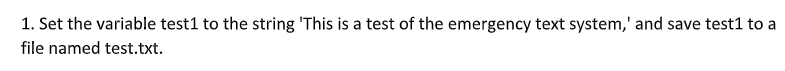

In [2]:
test1 = 'This is a test of the emergency text system,'
with open('test.txt','w') as txt:
  txt.write(test1)
  print('done!')


done!


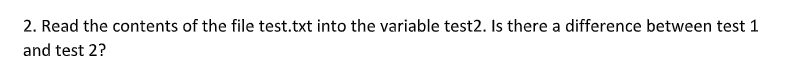

In [9]:
with open('test.txt','r') as txt:
  test2 = txt.readline()
  print('done reading !')

done reading !


In [10]:
print(test2)

This is a test of the emergency text system,


In [15]:
if test1 == test2:
  print('both values are same')

both values are same


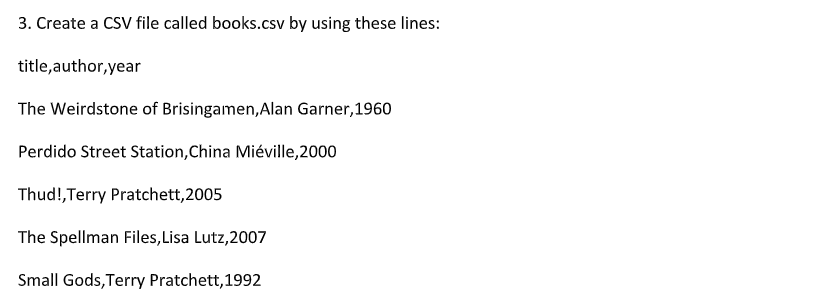

In [16]:
import csv

rows =[ ['title','author','year'],
        ['The Weirdstone of Brisingamen','Alan Garner',1960],
        ['Perdido Street Station','China Miéville',2000],
        ['Thud!','Terry Pratchett',2005],
        ['The Spellman Files','Lisa Lutz',2007],
        ['Small Gods','Terry Pratchett',1992]
       ]

with open('books.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

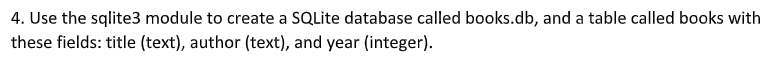

In [17]:
import sqlite3
conn = sqlite3.connect('books.db')
c = conn.cursor()

c.execute('create table books(title varchar(20),author varchar(20), year int)')
conn.commit()

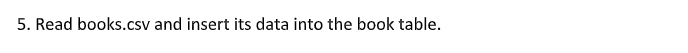

In [18]:
import pandas as pd

read_books = pd.read_csv('books.csv',encoding='unicode_escape')
read_books.to_sql('books', conn, if_exists='append', index = False)

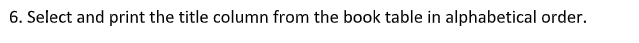

In [19]:
c.execute('select title from books order by title asc')
print(c.fetchall())

[('Perdido Street Station',), ('Small Gods',), ('The Spellman Files',), ('The Weirdstone of Brisingamen',), ('Thud!',)]


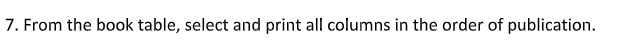

In [20]:
c.execute('select title, author,year from books order by year')


df = pd.DataFrame(c.fetchall(), columns=['title','author','year'])
print(df)

                           title           author  year
0  The Weirdstone of Brisingamen      Alan Garner  1960
1                     Small Gods  Terry Pratchett  1992
2         Perdido Street Station  China MiÃ©ville  2000
3                          Thud!  Terry Pratchett  2005
4             The Spellman Files        Lisa Lutz  2007


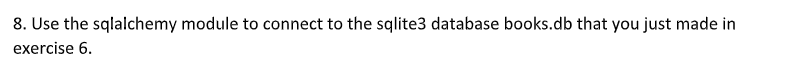

In [21]:
import sqlalchemy
engine = sqlalchemy.create_engine("sqlite:///books.db")
rows = engine.execute('select * from books')
for i in rows:
    print(i)

('The Weirdstone of Brisingamen', 'Alan Garner', 1960)
('Perdido Street Station', 'China MiÃ©ville', 2000)
('Thud!', 'Terry Pratchett', 2005)
('The Spellman Files', 'Lisa Lutz', 2007)
('Small Gods', 'Terry Pratchett', 1992)


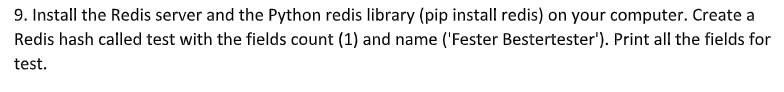

In [22]:
!pip install redis

     |████████████████████████████████| 175 kB 5.3 MB/s 


In [ ]:
import redis
conn = redis.Redis()
conn.delete('test') # deleting in case it is already present in redis server
conn.hmset('test', {'count': 1, 'name': 'Fester Bestertester'})
conn.hgetall('test')

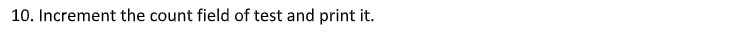

In [ ]:
conn.hincrby('test','count', 3)